# Bank marketing campaigns analysis - Slide Deck
## by Jyoti K

## Investigation Overview

> We will be analyzing Bank marketing campaigns dataset which is publicly available on Kaggle. This dataset describes Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If the client says yes to opening the term deposit account, the target variable 'y' is marked as 'yes', else 'no'.

## Dataset Overview

> There are 21 columns and 41176 rows in the dataset. Some of the variables in the dataset has values as 'unknown'. As removing these values could reduce our dataset size and impact our analysis, we will choose to keep the values as is.

## Fields in Dataset

> We have following fields available in the dataset:
 - _age_ : age (numeric)
 - _job_ : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
 - _marital_ : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
 - _education_ : educated upto (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
 - _default_ : has credit in default? (categorical: "no","yes","unknown")
 - _housing_ : has housing loan? (categorical: "no","yes","unknown")
 - _loan_ : has personal loan? (categorical: "no","yes","unknown")
 - _contact_ : contact communication type (categorical: "cellular","telephone")
 - _month_ : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

>  - _day_of_week_ : last contact day of the week (categorical: "mon","tue","wed","thu","fri")
 - _duration_ : last contact duration, in seconds (numeric). 
 - _campaign_ : number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - _pdays_ : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - _previous_ : number of contacts performed before this campaign and for this client (numeric)
 - _poutcome_ : outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 - _emp.var.rate_ : employment variation rate - quarterly indicator (numeric)
 - _cons.price.idx_ : consumer price index - monthly indicator (numeric)
 - _cons.conf.idx_ : consumer confidence index - monthly indicator (numeric)
 - _euribor3m_ : euribor 3 month rate - daily indicator (numeric)
 - _nr.employed_ : number of employees - quarterly indicator (numeric) - I assume these are the number of employees working for the bank at the time of the call.
 - _y_ : has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

# Change column names for ease of use
data.rename(columns = {'emp.var.rate' : 'EVR', 'cons.price.idx' : 'CPI', 
                       'cons.conf.idx' : 'CCI', 'euribor3m' : 'euribor',
                       'nr.employed' : 'no_emp'}, inplace = True)

# Drop any duplicates
data.drop_duplicates(inplace = True)

# New column name will be 'y_n' where n denotes numeric.

data.loc[data['y'] == 'yes', 'y_n'] = 1
data.loc[data['y'] == 'no', 'y_n'] = 0

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration

> Let's begin by checking what percentage of bank clients agree to open term deposit as per the given data.

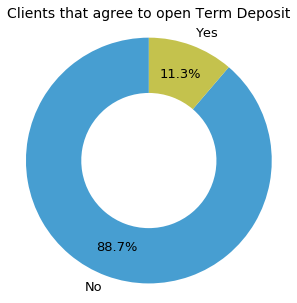

In [3]:
ratio = data.y.value_counts()

plt.figure(figsize = (5,5))
plt.pie(ratio, autopct='%1.1f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 13}, labels = ['No', 'Yes'])
plt.title('Clients that agree to open Term Deposit', fontdict = {'fontsize':'14'})
plt.axis('square');

### Out of the total calls that are made, 11.3 % of them are successful i.e. the client opens the term deposit.

## Univariate Exploration

> Age Distribution in data

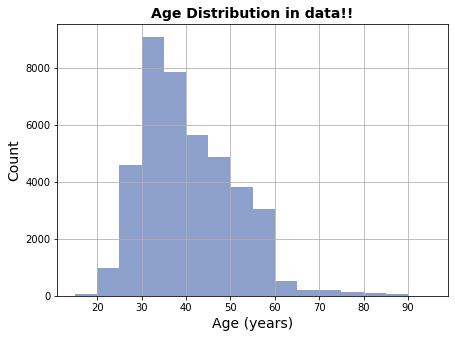

In [4]:
base_color = sns.color_palette('Set2')[2]

plt.figure(figsize = (7,5))

age_bins = np.arange(15, 100, 5)
plt.hist(data = data, x = 'age', bins = age_bins, color = base_color);

plt.xlabel('Age (years)', fontdict = {'fontsize':'14'})
plt.ylabel('Count', fontdict = {'fontsize':'14'})
plt.title('Age Distribution in data!!', fontdict = {'fontweight':'bold', 'fontsize':'14'})
plt.grid();

### 97.5% of the clients fall in age range of 20 - 60 years old.

## Univariate Exploration

> Result of previous campaign for the same client.

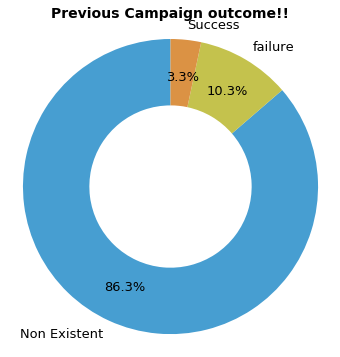

In [5]:
d_ratio = data['poutcome'].value_counts()

plt.figure(figsize = (6,6))
plt.pie(d_ratio, labels = ['Non Existent', 'failure', 'Success'], autopct='%1.1f%%', pctdistance=0.75, 
        colors = ['#479ed1', '#c4c24d', '#db9244'], startangle = 90, 
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 13})
plt.title('Previous Campaign outcome!!', fontdict = {'fontweight':'bold', 'fontsize':'14'})
plt.axis('square');

### Previous campaign outcome is known for 13.6% of the customers. 3.3% of previous outcomes were successful.

## Bivariate Exploration

> Explore Correlation in between numeric variables.

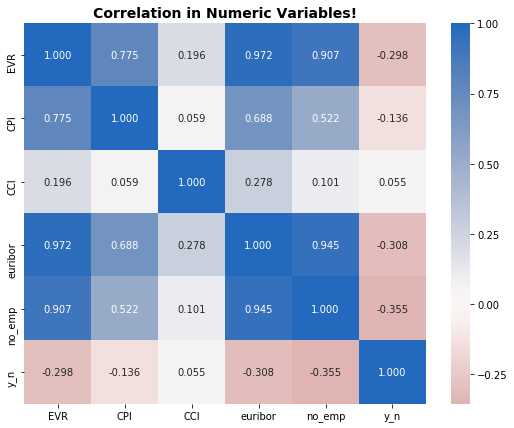

In [6]:
num_vars = ['EVR', 'CPI', 'CCI', 'euribor', 'no_emp', 'y_n']

# correlation plot
plt.figure(figsize = [9, 7])
font = {'fontweight':'bold', 'fontsize':'14', 'family': 'sans'}

ax = sns.heatmap(data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5);
plt.title('Correlation in Numeric Variables!', 
          fontdict = font);

### Our variable of interest 'y_n' appears to have some correlation with EVR, euribor and no_emp. We will explore this further in multivariate exploration. 

### There also seems to be very strong correlation in between Employment Variation Rate, Euribor and number of employees.

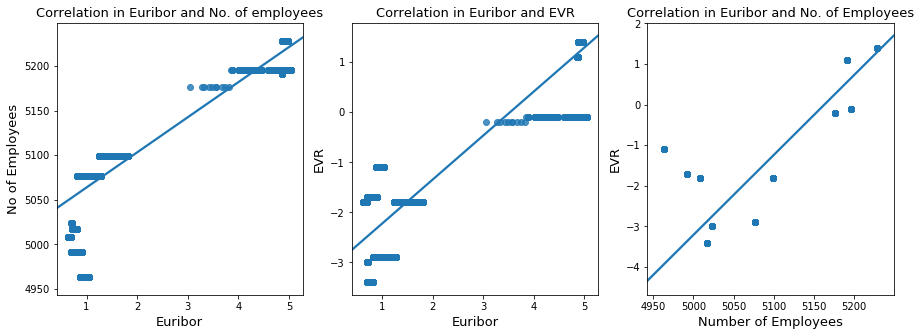

In [7]:
plt.figure(figsize = [15, 5])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor vs no_emp
plt.subplot(1, 3, 1)
sns.regplot(data = data, x = 'euribor', y = 'no_emp')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor vs EVR
plt.subplot(1, 3, 2)
sns.regplot(data = data, x = 'euribor', y = 'EVR')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: no_emp vs EVR
plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'no_emp', y = 'EVR')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of Employees', fontdict = font);

### It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other.

#### We also noted that when euribor is less than 2, EVR is always less than -1. Similarly, when euribor is more than 3, EVR is always more than 0.5.

## Bivariate Exploration

#### Let's go through some category variables to check if there is any trend in proportion of clients that say 'yes'.

In [8]:
# Define function to display a plot to show the proportion of clients who say 'yes' for a given category.

def proportion_plot(x):
    parm_counts = data.groupby([x, 'y']).size()
    parm_totals = data.groupby(x).size()
    proportions = parm_counts[:, 'yes']/parm_totals

# Draw bar graph
    plt.style.use('default')
    ind = np.arange(proportions.count())  # the x locations for the groups

# plot bars
    bars_0 = plt.bar(ind, proportions.sort_values(ascending = False), alpha=.7, color = base_color)

# title and labels
    plt.title('Campaign Success Proportion by {}'.format(x))
    labels = [l for l in proportions.sort_values(ascending = False).index]  # xtick labels
    plt.xticks(ind, labels, rotation = 30)

    plt.xlabel(x, fontdict = {'fontsize':'13'})
    plt.ylabel('Proportion', fontdict = {'fontsize':'13'})
    plt.grid()
    plt.show()

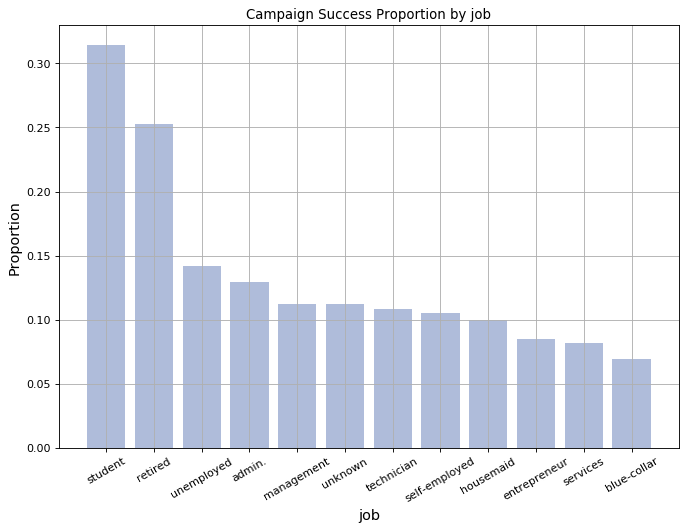

In [9]:
# Proportion by 'job' who say yes

plt.figure(figsize=(10,7), dpi=80)
proportion_plot('job')

### Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank.

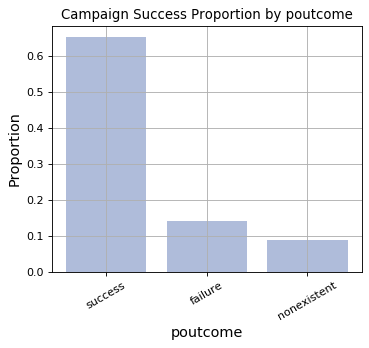

In [10]:
# Proportion by 'poutcome' who say yes

plt.figure(figsize=(5,4), dpi=80)
proportion_plot('poutcome')

### 65% of the people who agreed for previous campaign agreed for this campaign as well. That is a very significant number and certainly could be used by sales team to select target customers.

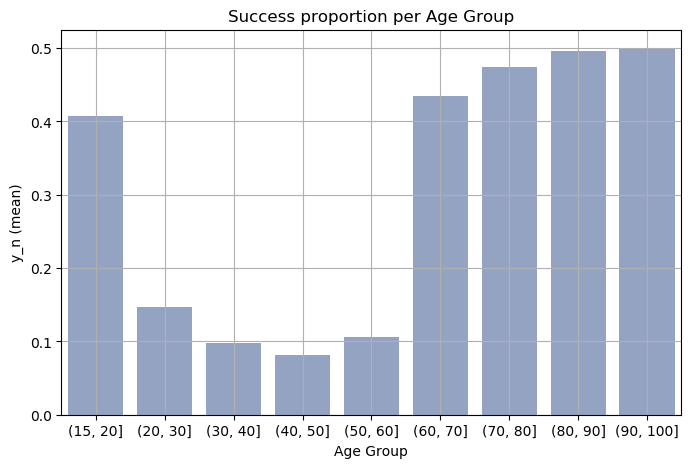

In [11]:
# Let's create age bins

age_bins = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data['age_grp'] = pd.cut(data['age'], bins = age_bins)
plt.figure(figsize = (8,5))
sns.barplot(data = data, x = 'age_grp', y = 'y_n', ci = None, color = base_color);
plt.title('Success proportion per Age Group')
plt.xlabel('Age Group')
plt.ylabel('y_n (mean)')
plt.grid()

### This is an interesting trend. Although 97.5% of clients fall in age range of 20-60, they are the ones who are least likely to open the account. Success rate for the calls is more for clients upto 20 and above 60 years of age.

## Multivariate Exploration

> ### Let's see how EVR, CCI, CPI and euribor affect our variable of interest 'y_n'.

In [12]:
samples = np.random.choice(data.shape[0], 500, replace = False)
df = data.loc[samples,:]

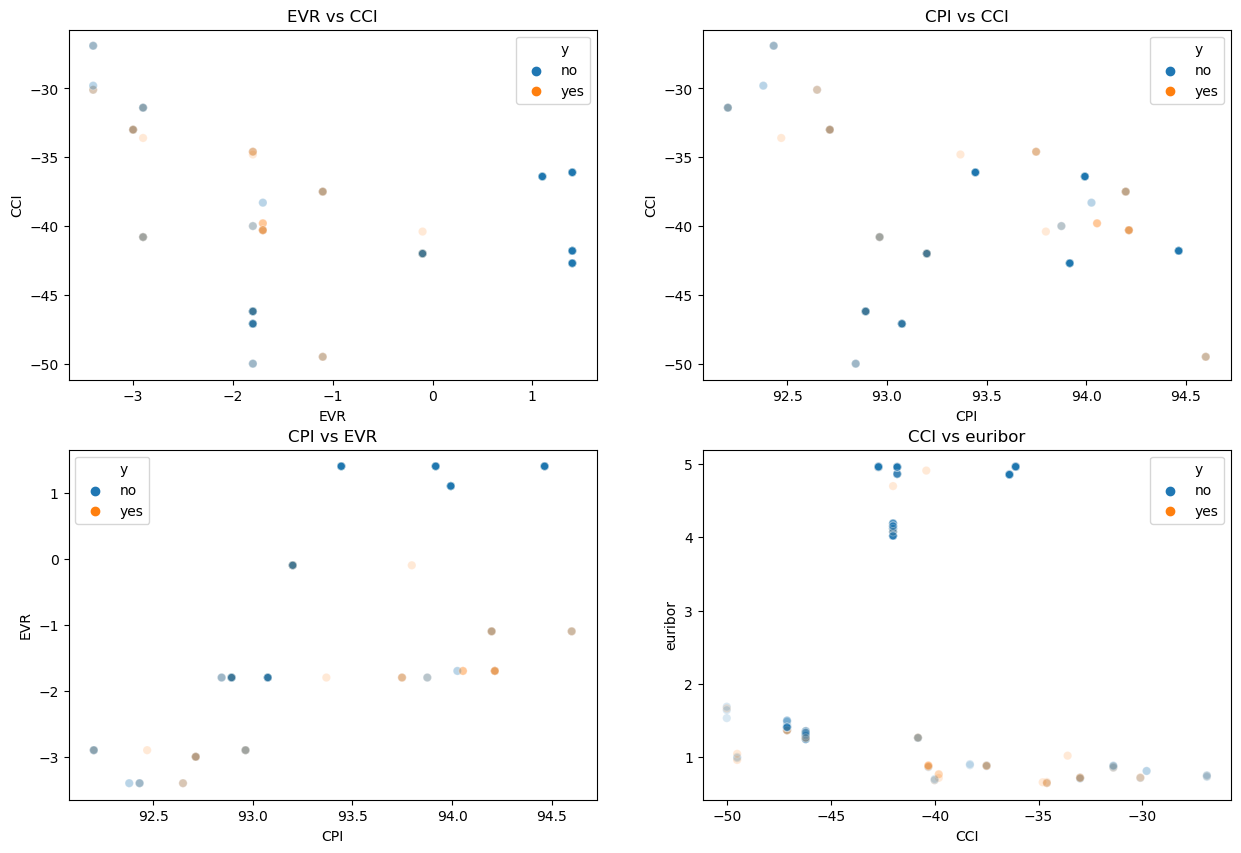

In [13]:
plt.figure(figsize = [15, 10])

# 1st plot: EVR vs CCI
plt.subplot(2, 2, 1)
sns.scatterplot(data = df, x = 'EVR', y = 'CCI', hue = 'y', alpha = 1/6);
plt.title('EVR vs CCI')

# 2nd plot: CPI vs CCI
plt.subplot(2, 2, 2)
sns.scatterplot(data = df, x = 'CPI', y = 'CCI', hue = 'y', alpha = 1/6);
plt.title('CPI vs CCI')

# 3rd plot: CPI vs EVR
plt.subplot(2, 2, 3)
sns.scatterplot(data = df, x = 'CPI', y = 'EVR', hue = 'y', alpha = 1/6);
plt.title('CPI vs EVR')

# 4th plot: CCI vs euribor
plt.subplot(2, 2, 4)
sns.scatterplot(data = df, x = 'CCI', y = 'euribor', hue = 'y', alpha = 1/6);
plt.title('CCI vs euribor');

### There appears to be some trend when euribor is less than 2.

We will explore this further in further slides.

## Multivariate Exploration

We will select records with Euribor less than 2 and perform further analysis on the data.

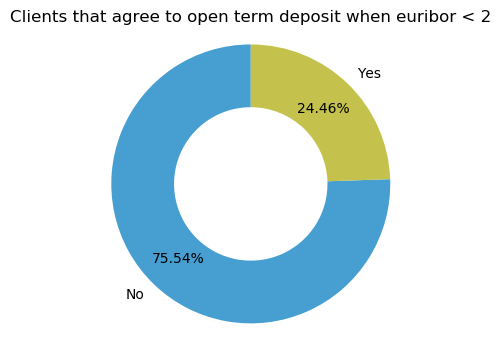

In [14]:
# selecting records from the whole dataset based on the criteria

df_sub = data.query('euribor < 2')

ratio = df_sub.y.value_counts()

plt.figure(figsize = (4,4))
plt.pie(ratio, labels = ['No', 'Yes'], autopct='%1.2f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 10})
plt.title('Clients that agree to open term deposit when euribor < 2')
plt.axis('square');

- **When EVR < -1 and euribor < 2, 24.46% of people agree to opening term deposit. This is more than double of success rate in whole dataset.**
- **Number of calls placed when euribor is less than 2 (13494), are half of those place when euribor is 2 or more (27682). This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.**

---

Further, Let's check Success Proportion as per age when Euribor < 2.

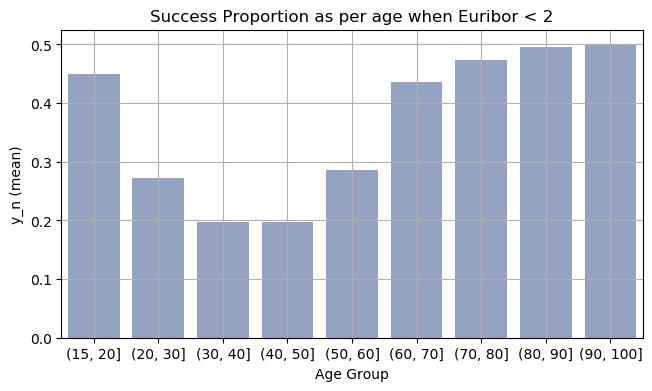

In [15]:
plt.figure(figsize = (7.5,4))

sns.barplot(data = df_sub, x = 'age_grp', y = 'y_n', ci = None, color = base_color);
plt.title('Success Proportion as per age when Euribor < 2')
plt.xlabel('Age Group')
plt.ylabel('y_n (mean)')
plt.grid()

- **When we compare this trend with overall data trend, there are some considerable changes. We see that clients upto 60 years of age, open considerably higher percentage of term deposits when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.**
- **22.93% of young people(upto age 60) open term deposit when euribor < 2. This is more than the average of 10.49% over the whole dataset.**

## Observations

- We noticed that when euribor 3 month rate is less than 2, success rate of the campaign increases to 24.46%. This is significant increase from 11.3% success rate in overall data.

- Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.

- Statistically, 22.93% of young people(upto age 60) open term deposits when euribor < 2. This is more than the average of 10.49% over the whole dataset for the same age group. Therefore, we can conclude that clients upto 60 years of age open considerably higher percentage of accounts when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.

## Recommendations for Improvement 

- We observed that when euribor 3 month rate is less than 2, clients under the age of 60 are twice more likely to open a term deposit. We should noticed that bank called only half the number of customers when euribor was less than 2 as compared to otherwise. So, we should target to call more customers during this period for better success rate.

- In overall data, students and retirees are much more likely to open term deposit. 45% of clients above 60 years of age agreed to open term deposit. But we have only 2.5% of customers in this range. It is recommended to include more of students, retirees and clients older than 60 years of age to get a better success rate in overall dataset.

- Clients for whom previous campaign outcome was successful, agreed to 65% of the calls. This is significant figure and can be used to target customers in further campaigns.



## Thanks for your time!

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!